# Fake Data Analysis

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from data_treatment import DataAtts
import ipywidgets as widgets
import matplotlib.pyplot as plt
import glob
from compare_data import *
from IPython.display import display

In [3]:
files_dropdown = widgets.Dropdown(
    options=glob.glob("original_data/*.csv"),
    description='Original file:',
    value = 'original_data/diabetes_escalonated.csv',
    disabled=False,
)
display(files_dropdown)

Dropdown(description='Original file:', options=('original_data/diabetes_escalonated.csv', 'original_data/data.…

In [4]:
folder_name = files_dropdown.value[14:-4]
fake_files_dropdown = widgets.Dropdown(
    options=glob.glob("fake_data/" + folder_name + "/*.csv"),
    description='Fake file:',
    disabled=False,
)
display(fake_files_dropdown)

Dropdown(description='Fake file:', options=('fake_data/diabetes_escalonated/id-6_epochs-500_layer-1_lr-0.0002_…

In [5]:
file_name=files_dropdown.value
dataAtts = DataAtts(file_name)
    
    
data = pd.read_csv(file_name)
fake_data = pd.read_csv(fake_files_dropdown.value)
fake_data.loc[getattr(fake_data, dataAtts.class_name) >= 0.5, dataAtts.class_name] = 1
fake_data.loc[getattr(fake_data, dataAtts.class_name) < 0.5, dataAtts.class_name] = 0

print(dataAtts.message)
print(dataAtts.values_names[0], round(data[dataAtts.class_name].value_counts()[0]/len(data) * 100,2), '%  of the dataset')
print(dataAtts.values_names[1], round(data[dataAtts.class_name].value_counts()[1]/len(data) * 100,2), '%  of the dataset')

print("\nFake Data")
try:
    positive=str(round(fake_data[dataAtts.class_name].value_counts()[0]/len(fake_data) * 100,2))
except:
    positive="0"
try:
    negative=str(round(fake_data[dataAtts.class_name].value_counts()[1]/len(fake_data) * 100,2))
except:
    negative="0"
    

print("Outcome = 0: ", positive, '%  of the dataset')
print("Outcome = 1: ", negative, '%  of the dataset')

Pima Indians Diabetes Database eSCALONATED
Normal 65.1 %  of the dataset
Diabets 34.9 %  of the dataset

Fake Data
Outcome = 0:  65.49 %  of the dataset
Outcome = 1:  34.51 %  of the dataset


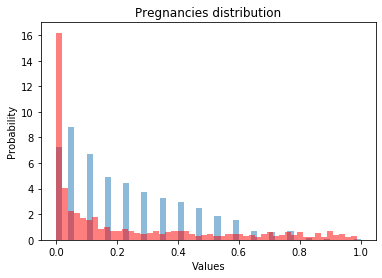

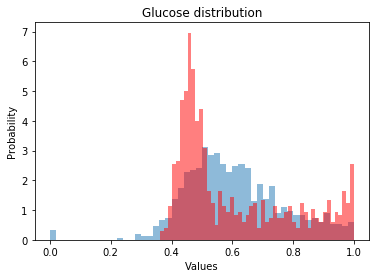

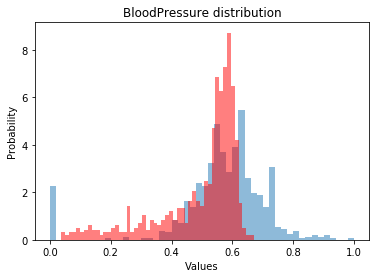

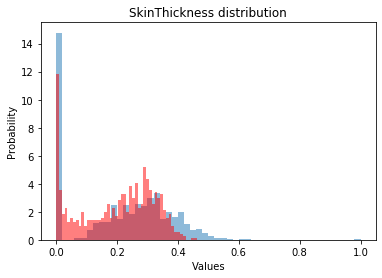

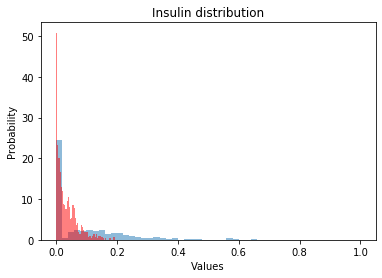

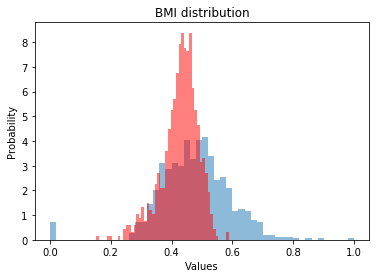

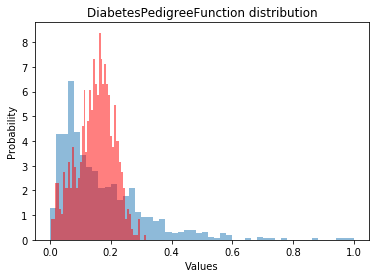

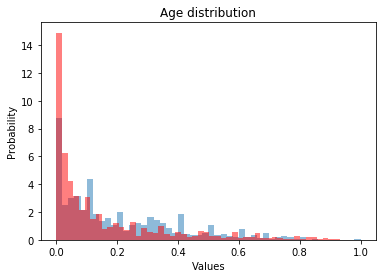

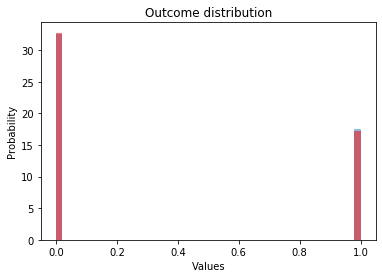

<Figure size 432x288 with 0 Axes>

In [6]:
classes = list(data)

for name in classes:
    if name=="Unnamed: 32":
        continue
        
    plt.xlabel('Values')
    plt.ylabel('Probability')
    plt.title(name + " distribution")
    real_dist = data[name].values
    fake_dist = fake_data[name].values
    plt.hist(real_dist, 50, density=True, alpha=0.5)
    plt.hist(fake_dist, 50, density=True, alpha=0.5, facecolor='r')
    #plt.savefig('fake_data/'+ dataAtts.fname + "/"+name+'_distribution.png')
    plt.show()
    plt.clf()
